In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

In [141]:
class SGDRegressor:
    def __init__(self, fit_intercept=True, normalize=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        
    def _add_intercept(self, X):
        """
        Function is responsible for adding intercept to features.
        
        Parameters
        ----------
        X : DataFrame
            Features
            
        Returns
        -------
        DataFrame
            Features with ones in the first column.
        """
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
            
    def _compute_loss(self):
        m = self.X.shape[0]
        h = np.dot(self.X, self.theta)
        loss =np.sum((h - y) ** 2) / (2 * m)
        return loss
    
    def _compute_hypothesis(self, X, theta):
        return np.dot(X, theta)
            
    def _descend_gradient(self, X, Y, alpha, num_iter):
        m = X.shape[0]
        num_features = X.shape[1]
        theta = np.zeros((num_features, 1))
        
        for i in range(num_iter):
            h = self._compute_hypothesis(X, theta)
            error = h - Y
            temp_X = np.dot(error.T, X)
            theta = theta - (alpha / m)  * (temp_X.T)
        return theta

    def fit(self, X, Y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        self.theta = self._descend_gradient(X, Y, alpha=0.01, num_iter=1000)
    
    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return np.dot(X, self.theta)

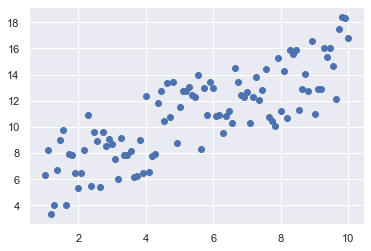

In [110]:
X = np.linspace(1, 10, 100)
errors = np.random.rand(100)
Y = 2 + X + 7*errors

plt.scatter(X, Y)

In [142]:
model = SGDRegressor()
model.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
y_pred = model.predict(X.reshape(-1, 1))

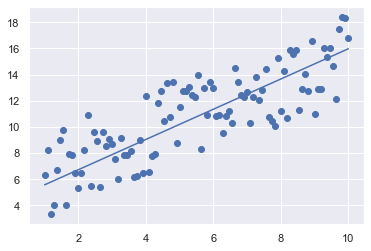

In [143]:
plt.scatter(X, Y)
plt.plot(X, y_pred);

In [127]:
model.theta.shape

(2, 100)

In [138]:
Y.reshape(-1,1).shape

(100, 1)